### Exercise 3: Stochastic Gradient Learning in Neural Networks
1. Describe the stochastic gradient descent algorithm for minimizing the empirical risk and implement it.
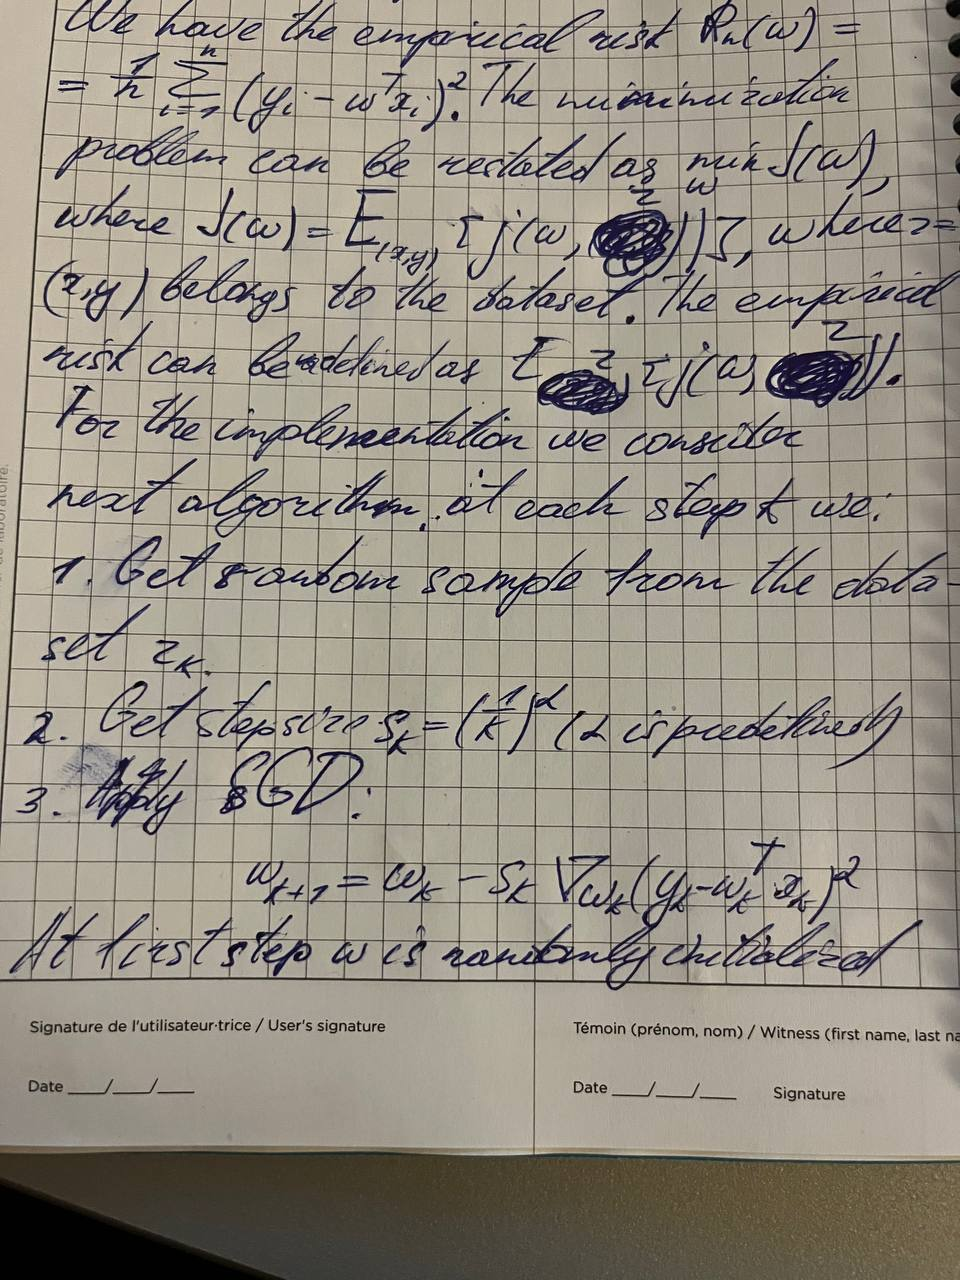


In [209]:
import numpy as np

In [210]:
def sgd(x, y, w, alpha, epochs):
    n = x.shape[0]
    for i in range(epochs):
        k = np.random.randint(1, n)
        e = (1/k)**alpha
        w = w - e*2*(-(y[k-1] - np.dot(w, x[k-1,:])) * x[k-1,:])
        w = w/np.linalg.norm(w)
    return(w)

  2. Sample a set of observations $\{z_i\}_{i=1}^n$ by generating a collection of random points $x_i$ of $\mathbb{R}^2, w \in \mathbb{R}^2$ seen as the normal vector of an hyperplane, a straight line here, and assigning the label $y_i$ according to the side of the hyperplane the point $x_i$ is.

In [211]:
import matplotlib.pyplot as plt

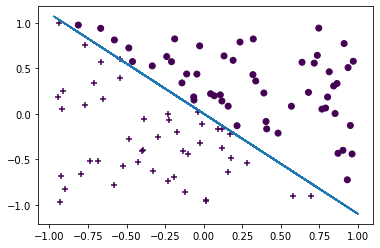

In [216]:
n = 100
x = np.random.uniform(-1, 1, (n, 2)) #we can't sample from RxR, because numpy has restrictions so we will do it in [-1, 1]x[-1, 1]
w = np.random.uniform(-1, 1, (2,))
y = np.sign(np.dot(x, w))
x1 = x[(y.reshape(n,)>0), :]
x2 = x[(y.reshape(n,)<0), :]
t = np.array(np.random.uniform(-1, 1, (n, 1)))
plt.plot(t,-w[0]*t/w[1])
plt.scatter(x1[:, 0], x1[:, 1], c=y[(y.reshape(n,)>0)], marker = '+')
plt.scatter(x2[:, 0], x2[:, 1], c=y[(y.reshape(n,)<0)], marker = 'o');

3. Test the algorithm you wrote at the first question over these observations. What is the vector $w^{\star}$ estimated ? Is it far from $w$?

w =  [-0.78800457 -0.71518575]
w_new =  [-0.7200128  -0.69396078]
||w_new - w|| =  0.07122766170443


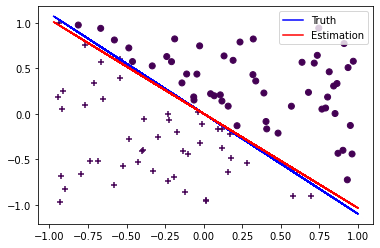

In [217]:
w_start = np.random.uniform(-1, 1, (2,))
w_start = w_start/np.linalg.norm(w_start)
w_new = sgd(x, y, w_start, alpha = 0.5, epochs=1000)
plt.scatter(x1[:, 0], x1[:, 1], c=y[(y.reshape(n,)>0)], marker = '+');
plt.scatter(x2[:, 0], x2[:, 1], c=y[(y.reshape(n,)<0)], marker = 'o');
plt.plot(t,-w[0]*t/w[1],color='blue', label = 'Truth')
plt.plot(t,-w_new[0]*t/w_new[1],color='red', label = 'Estimation')
plt.legend();
print("w = ", w)
print("w_new = ", w_new)
print("||w_new - w|| = ", np.linalg.norm(w-w_new))

As we can see SGD worked pretty well, w almost the same, error is pretty small.

4. Noise your observations ${(z_i)}_{i=1}^n$ with an additive Gaussian noise and perform the optimization again. Compare with the result of question three.

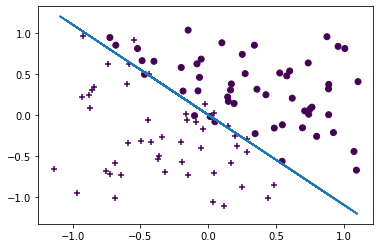

In [218]:
s = 0.1
x_n = x + np.random.normal(0, s, (n, 2))
x1 = x_n[(y.reshape(n,)>0), :]
x2 = x_n[(y.reshape(n,)<0), :]
t = np.array(np.random.uniform(-1-s, 1+s, (n, 1)))
plt.plot(t,-w[0]*t/w[1])
plt.scatter(x1[:, 0], x1[:, 1], c=y[(y.reshape(n,)>0)], marker = '+')
plt.scatter(x2[:, 0], x2[:, 1], c=y[(y.reshape(n,)<0)], marker = 'o');

w =  [-0.78800457 -0.71518575]
w_new =  [-0.61429923 -0.78907316]
||w_new - w|| =  0.18876677487892818


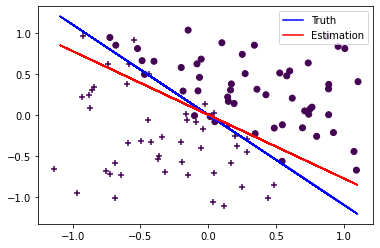

In [219]:
w_start = np.random.uniform(-1, 1, (2,))
w_start = w_start/np.linalg.norm(w_start)
w_new = sgd(x_n, y, w_start, alpha = 0.5, epochs=1000)
plt.scatter(x1[:, 0], x1[:, 1], c=y[(y.reshape(n,)>0)], marker = '+');
plt.scatter(x2[:, 0], x2[:, 1], c=y[(y.reshape(n,)<0)], marker = 'o');
plt.plot(t,-w[0]*t/w[1],color='blue', label = 'Truth')
plt.plot(t,-w_new[0]*t/w_new[1],color='red', label = 'Estimation')
plt.legend();
print("w = ", w)
print("w_new = ", w_new)
print("||w_new - w|| = ", np.linalg.norm(w-w_new))

With noisy data we have worse situation. Let's test with larger sigma.

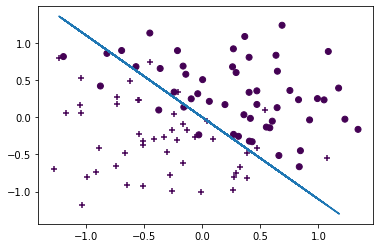

In [220]:
s = 0.25
x_n = x + np.random.normal(0, s, (n, 2))
x1 = x_n[(y.reshape(n,)>0), :]
x2 = x_n[(y.reshape(n,)<0), :]
t = np.array(np.random.uniform(-1-s, 1+s, (n, 1)))
plt.plot(t,-w[0]*t/w[1])
plt.scatter(x1[:, 0], x1[:, 1], c=y[(y.reshape(n,)>0)], marker = '+')
plt.scatter(x2[:, 0], x2[:, 1], c=y[(y.reshape(n,)<0)], marker = 'o');

w =  [-0.78800457 -0.71518575]
w_new =  [-0.90173174 -0.43229605]
||w_new - w|| =  0.3048941662124477


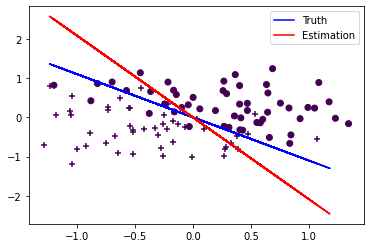

In [221]:
w_start = np.random.uniform(-1, 1, (2,))
w_start = w_start/np.linalg.norm(w_start)
w_new = sgd(x_n, y, w_start, alpha = 0.5, epochs=1000)
w_new = w_new/np.linalg.norm(w_new)
plt.scatter(x1[:, 0], x1[:, 1], c=y[(y.reshape(n,)>0)], marker = '+');
plt.scatter(x2[:, 0], x2[:, 1], c=y[(y.reshape(n,)<0)], marker = 'o');
plt.plot(t,-w[0]*t/w[1],color='blue', label = 'Truth')
plt.plot(t,-w_new[0]*t/w_new[1],color='red', label = 'Estimation')
plt.legend();
print("w = ", w)
print("w_new = ", w_new)
print("||w_new - w|| = ", np.linalg.norm(w-w_new))

The larger the noise, the larger the error. The SGD doesn't really stably perform with noisy data. However, even without noisy data model can produce big errors in some runs. 

5. Test the algorithm on the Breast Cancer Wisconsin (Diagnostic) Data Set

In [222]:
import pandas as pd
names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 
         'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 
         'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 
         'Mitoses', 'Class']
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=names)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [223]:
for name in df.columns[1:]:
  print(df[name].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


In [224]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

There are ? in Bare Nuclei, so we will replace it with np.Nan, then with median.  

In [225]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.nan)
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [226]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
df['Bare Nuclei'] = df['Bare Nuclei'].replace(np.nan, df['Bare Nuclei'].median())
df['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [227]:
for name in df.columns[1:]:
  print(df[name].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
[ 1. 10.  2.  4.  3.  9.  7.  5.  8.  6.]
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


The class column has Benign (2) and Malignant (4). Let's replace 2 with -1 and 4 with 1 and delete code column.

In [228]:
df['Class'] = df['Class'] - 3
del df['Sample code number']
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,-1
1,5,4,4,5,7,10.0,3,2,1,-1
2,3,1,1,1,2,2.0,3,1,1,-1
3,6,8,8,1,3,4.0,3,7,1,-1
4,4,1,1,3,2,1.0,3,1,1,-1


Next we will retrieve x and, normalize train data and split it for testing and training. 

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer 

In [230]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=171)
scaler = Normalizer().fit(X_train)
x_train = scaler.transform(X_train)
scaler = Normalizer().fit(X_test)
x_test = scaler.transform(X_test)

Next, we will perfrom the SGD and check it performance with Confusion 

In [259]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

Accuracy =  0.8214285714285714
Presicion =  0.7377049180327869
Recall =  0.8333333333333334
F1-score =  0.782608695652174


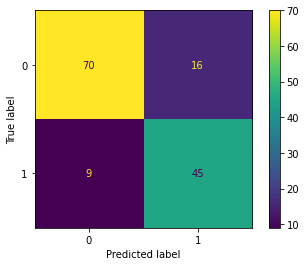

In [456]:
w_start = np.random.uniform(-1, 1, (X_train.shape[1],))
w_start = w_start/np.linalg.norm(w_start)
w_new = sgd(X_train, y_train, w_start, alpha=0.6, epochs=10000)
y_new = [np.sign(i) for i in list(X_test.dot(w_new))]
print('Accuracy = ', accuracy_score(y_test, y_new))
print('Presicion = ', precision_score(y_test, y_new))
print('Recall = ', recall_score(y_test, y_new))
print('F1-score = ', f1_score(y_test, y_new))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_new)).plot();

As we can see all scores look descent, accuracy is 82%. Presicion, recall and f1-score on almost the same level 0.8.